In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


# import data

In [2]:
data_train = pd.read_csv('product_train.csv')
data_test = pd.read_csv('product_test.csv')
data_train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits
3,14369,829,45,NaN,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses
4,505,833,56,NaN,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses


In [3]:
print('Training data dimensions',np.shape(data_train))
print('Test data dimensions',np.shape(data_test))

Training data dimensions (16440, 11)
Test data dimensions (6803, 10)


# Data understanding

In [4]:
#processing missing data
#check missing values
print(data_train.isnull().sum())
print(data_test.isnull().sum())

ID                            0
Product_ID                    0
Age                           0
Review_Title               2638
Review_Text                 602
Rating                        0
Recommended                   0
Positive_Feedback_Count       0
Division                      9
Department                    9
Type                          9
dtype: int64
ID                           0
Product_ID                   0
Age                          0
Review_Title               929
Review_Text                  0
Rating                       0
Positive_Feedback_Count      0
Division                     5
Department                   5
Type                         5
dtype: int64


In [5]:
#filling missing values
data_train['Review_Title'].fillna('No title', inplace = True)
data_train['Review_Text'].fillna('No review', inplace = True)

data_test['Review_Title'].fillna('No title', inplace = True)

In [6]:
data_train = data_train.dropna()

In [7]:
#filling missing values in test data
data_test.loc[data_test['Division'].isnull()]

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
2696,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,NaN,NaN,NaN
4653,16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,NaN,NaN,NaN
6216,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,0,NaN,NaN,NaN
6638,22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,NaN,NaN,NaN
6640,23006,136,33,Cute itsy socks,"Love polkadots, love sparkle. these little soc...",5,0,NaN,NaN,NaN


In [8]:
#filling missing values in test set data by review clues
data_test.loc[2696,['Division','Department','Type']] = ['Initmates', 'Intimate', 'Legwear']
data_test.loc[4653,['Division','Department','Type']] = ['Initmates', 'Intimate', 'Legwear']
data_test.loc[6216,['Division','Department','Type']] = ['Initmates', 'Intimate', 'Sleep']
data_test.loc[6638,['Division','Department','Type']] = ['Initmates', 'Intimate', 'Legwear']
data_test.loc[6640,['Division','Department','Type']] = ['Initmates', 'Intimate', 'Legwear']
data_test.loc[[2696,4653,6216,6638,6640],:]

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type
2696,9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,0,Initmates,Intimate,Legwear
4653,16221,152,37,Love!,I am loving these. they are quite long but are...,5,0,Initmates,Intimate,Legwear
6216,21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,0,Initmates,Intimate,Sleep
6638,22997,136,47,"Charcoal, pale gray, a bit of silver!","These socks are soft and comfortable, and they...",5,1,Initmates,Intimate,Legwear
6640,23006,136,33,Cute itsy socks,"Love polkadots, love sparkle. these little soc...",5,0,Initmates,Intimate,Legwear


In [9]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())

ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Recommended                0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64
ID                         0
Product_ID                 0
Age                        0
Review_Title               0
Review_Text                0
Rating                     0
Positive_Feedback_Count    0
Division                   0
Department                 0
Type                       0
dtype: int64


In [14]:
print('Training data dimensions',np.shape(data_train))
print('Test data dimensions',np.shape(data_test))

Training data dimensions (16431, 11)
Test data dimensions (6803, 10)


In [15]:
data_train.corr()['Recommended'].round(3)

ID                        -0.009
Product_ID                -0.016
Age                        0.035
Rating                     0.795
Recommended                1.000
Positive_Feedback_Count   -0.069
Name: Recommended, dtype: float64

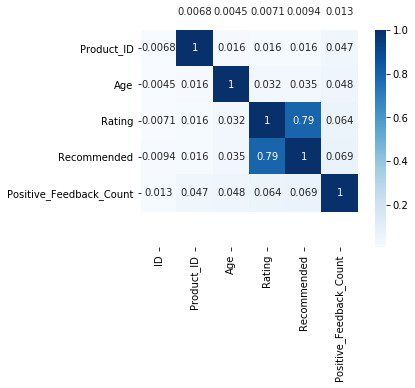

In [16]:
corr = data_train.corr().abs()
sns.heatmap(corr, cmap = 'Blues', square = True, annot=True)
plt.ylim(len(corr)+1.0,1.0)
plt.show()

# EDA

In [17]:
descriptive = data_train.describe()
descriptive.loc['skew',:] = data_train.skew()
descriptive.loc['kurt',:] = data_train.kurt()
descriptive.round(3)

,ID,Product_ID,Age,Rating,Recommended,Positive_Feedback_Count
count,16431.000,16431.000,16431.000,16431.000,16431.000,16431.000
mean,11706.350,918.695,43.197,4.203,0.824,2.565
std,6769.360,203.485,12.274,1.106,0.381,5.912
min,0.000,0.000,18.000,1.000,0.000,0.000
25%,5863.500,861.000,34.000,4.000,1.000,0.000
50%,11694.000,936.000,41.000,5.000,1.000,1.000
75%,17536.500,1078.000,52.000,5.000,1.000,3.000
max,23485.000,1205.000,99.000,5.000,1.000,122.000
skew,0.006,-2.090,0.532,-1.327,-1.701,6.842
kurt,-1.197,5.195,-0.082,0.844,0.894,77.841


In [18]:
data_train['Age'].value_counts(normalize = True).round(3)

39    0.054
35    0.041
36    0.035
34    0.035
37    0.033
      ...  
93    0.000
90    0.000
86    0.000
99    0.000
92    0.000
Name: Age, Length: 77, dtype: float64

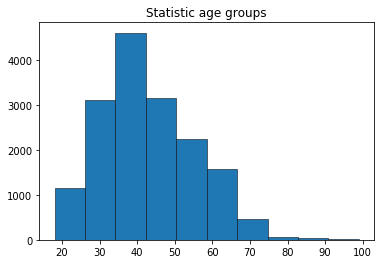

In [19]:
plt.hist(data_train['Age'], edgecolor = 'black', linewidth=0.5)
plt.title("Statistic age groups")
plt.show()

In [20]:
data_train['Rating'].value_counts(normalize = True).round(3)

5    0.562
4    0.216
3    0.120
2    0.067
1    0.035
Name: Rating, dtype: float64

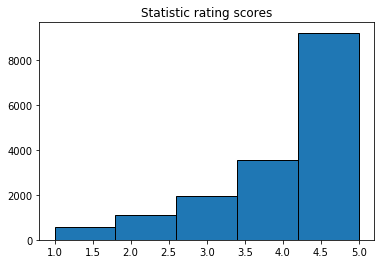

In [21]:
#ax = sns.distplot(data_train['Rating'])
#ax.set_title('Distribution plot for Rating')
plt.hist(data_train['Rating'],5, edgecolor = 'black')
plt.title("Statistic rating scores")
plt.show()

In [22]:
data_train['Recommended'].value_counts(normalize = True).round(3)

1    0.824
0    0.176
Name: Recommended, dtype: float64

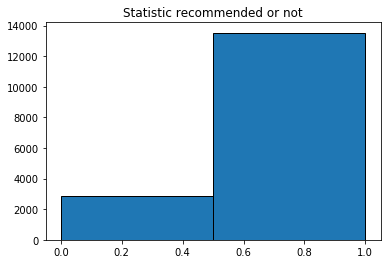

In [23]:
plt.hist(data_train['Recommended'], 2, edgecolor = 'black')
plt.title("Statistic recommended or not")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

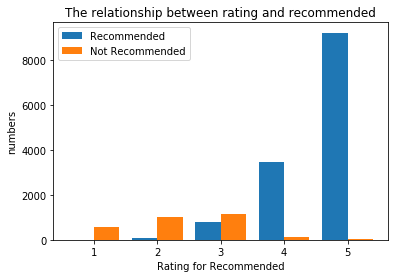

In [24]:
#explore the relationship between rating and recommended
rec1 = data_train[data_train['Recommended']==1]
rec0 = data_train[data_train['Recommended']==0]

plt.hist([rec1['Rating'],rec0['Rating']],bins = np.arange(0,6)+0.5, width = 0.4)
plt.xlabel('Rating for Recommended')
plt.ylabel('numbers')
plt.title('The relationship between rating and recommended')
plt.legend(['Recommended','Not Recommended'],loc = 2)
plt.show

In [25]:
#checking sales of different categories
sale_count = data_train.pivot_table(index=['Product_ID','Division','Department','Type']
                                   ,values=['ID']
                                   ,aggfunc=['count'])
sale_count.sort_values(by=('count','ID'))

,,,,count
,,,,ID
Product_ID,Division,Department,Type,
0,General,Jackets,Outerwear,1
797,Initmates,Intimate,Lounge,1
449,General,Bottoms,Shorts,1
447,General,Bottoms,Shorts,1
798,Initmates,Intimate,Intimates,1
...,...,...,...,...
1081,General Petite,Dresses,Dresses,280
1078,General Petite,Dresses,Dresses,287


In [26]:
#checking the average feedback for each product
sale_value = data_train.pivot_table(index=['Product_ID','Division','Department','Type']
                                   ,values=['Rating','Positive_Feedback_Count','Recommended','Age']
                                   ,aggfunc=np.mean).round(3)
sale_value

,,,,Age,Positive_Feedback_Count,Rating,Recommended
Product_ID,Division,Department,Type,,,,
0,General,Jackets,Outerwear,26.000,0.000,5.000,1.000
1,Initmates,Intimate,Layering,36.667,0.333,4.000,0.667
2,General,Tops,Knits,28.000,0.000,4.000,1.000
4,General,Tops,Sweaters,28.000,0.000,5.000,1.000
5,General,Tops,Sweaters,39.000,0.000,5.000,1.000
...,...,...,...,...,...,...,...
1200,General,Dresses,Dresses,24.000,0.000,3.000,0.000
1202,General Petite,Dresses,Dresses,40.143,0.429,4.143,1.000
1203,Initmates,Intimate,Layering,36.400,0.100,4.500,0.800


In [27]:
#checking the highest-sales products and the average feedback for them
sale_value['amount_sold'] = sale_count[('count','ID')]
sale_value.sort_values(by='amount_sold',ascending=False)

,,,,Age,Positive_Feedback_Count,Rating,Recommended,amount_sold
Product_ID,Division,Department,Type,,,,,
1078,General,Dresses,Dresses,42.334,2.680,4.290,0.863,431
862,General,Tops,Knits,42.900,2.203,4.120,0.808,359
1094,General,Dresses,Dresses,40.990,2.962,4.309,0.876,314
1078,General Petite,Dresses,Dresses,42.840,3.105,4.059,0.756,287
1081,General Petite,Dresses,Dresses,41.521,2.989,4.329,0.861,280
...,...,...,...,...,...,...,...,...
495,General,Bottoms,Shorts,39.000,2.000,1.000,0.000,1
496,General,Bottoms,Shorts,37.000,0.000,5.000,1.000,1
497,Initmates,Intimate,Lounge,25.000,2.000,4.000,1.000,1


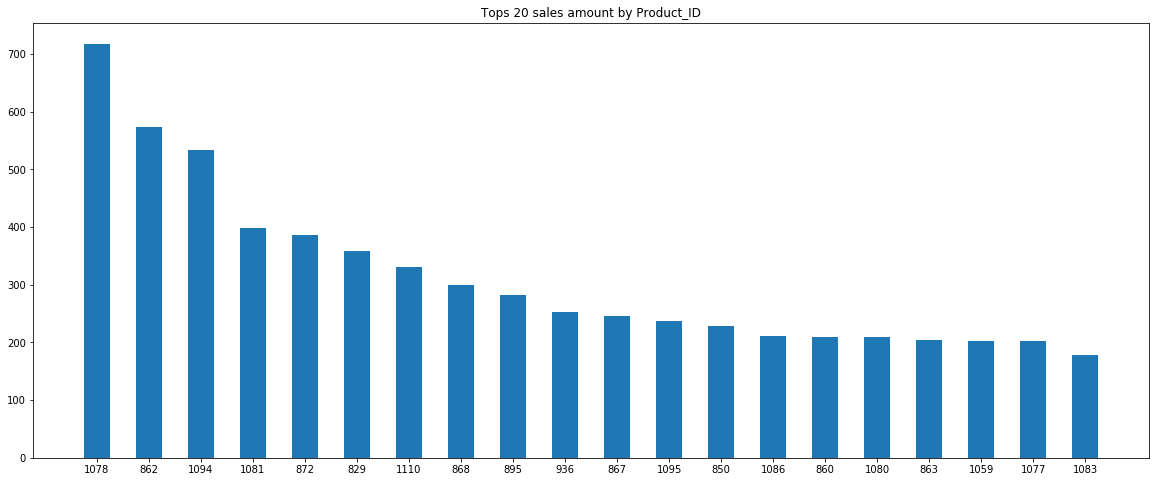

In [28]:
plt.figure(figsize=(20,8))
x_sale = data_train['Product_ID'].value_counts().index[:20].astype(str)
y_sale = data_train['Product_ID'].value_counts()[:20]

plt.title("Tops 20 sales amount by Product_ID")
plt.bar(x_sale,y_sale,width=0.5)
plt.show()

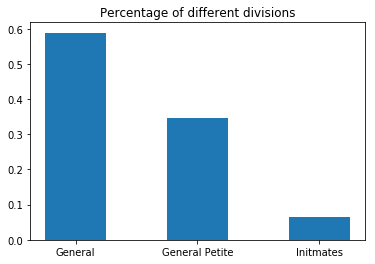

In [29]:
x_div = data_train['Division'].value_counts().index
y_div = data_train['Division'].value_counts()/data_train['Division'].value_counts().sum()

plt.title("Percentage of different divisions")
plt.bar(x_div,y_div,width=0.5)
plt.show()


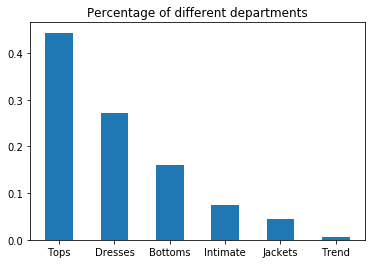

In [30]:
x_dep = data_train['Department'].value_counts().index
y_dep = data_train['Department'].value_counts()/data_train['Department'].value_counts().sum()

plt.title("Percentage of different departments")
plt.bar(x_dep,y_dep,width=0.5)
plt.show()

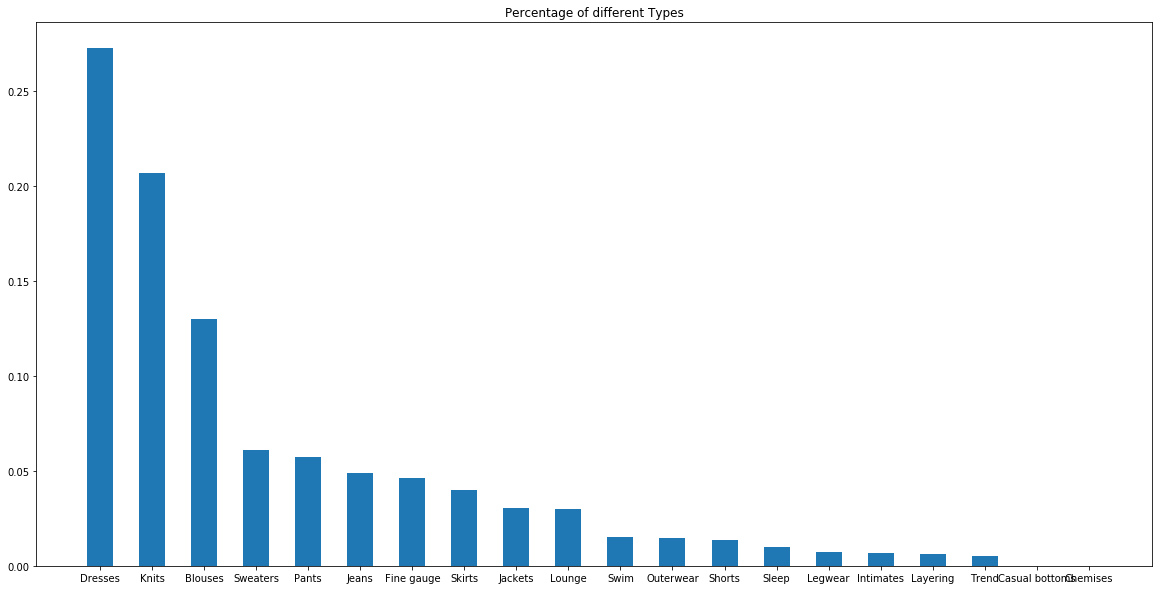

In [31]:
plt.figure(figsize=(20,10))
x_type = data_train['Type'].value_counts().index
y_type = data_train['Type'].value_counts()/data_train['Type'].value_counts().sum()


plt.title("Percentage of different Types")
plt.bar(x_type,y_type,width=0.5)
plt.show()

In [32]:
#Rating for different categories
stat_rat = pd.crosstab(data_train['Rating'], data_train['Division'])
stat_rat

Division,General,General Petite,Initmates
Rating,,,
1,335,205,39
2,668,364,62
3,1191,670,107
4,2099,1229,229
5,5384,3212,637


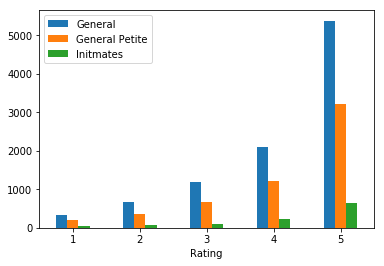

In [33]:
rat_div = {'General': stat_rat['General'], 'General Petite': stat_rat['General Petite'], 'Initmates':stat_rat['Initmates']}
df_rat_div = pd.DataFrame(data = rat_div,index = stat_rat.index)

ax1 = df_rat_div.plot.bar(rot=0)


In [34]:
df_rat_div = pd.DataFrame()

In [35]:
#Rating for different categories
stat_rec = pd.crosstab(data_train['Recommended'], data_train['Division'])
stat_rec

Division,General,General Petite,Initmates
Recommended,,,
0,1729,1002,162
1,7948,4678,912


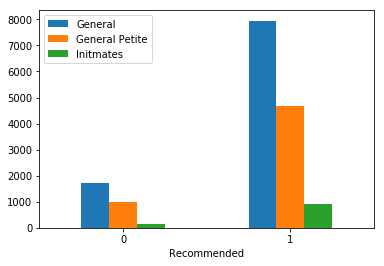

In [36]:
rec_div = {'General': stat_rec['General'], 'General Petite': stat_rec['General Petite'], 'Initmates':stat_rec['Initmates']}
df_rec_div = pd.DataFrame(data = rec_div,index = stat_rec.index)

ax2 = df_rec_div.plot.bar(rot=0)

In [37]:
stat_rat_dep = pd.crosstab(data_train['Department'], data_train['Rating']).sort_values(by = 5,ascending = False)
stat_rat_dep

Rating,1,2,3,4,5
Department,,,,,
Tops,256,512,902,1579,4039
Dresses,168,324,578,988,2417
Bottoms,70,141,293,558,1558
Intimate,43,70,126,264,732
Jackets,37,40,55,147,453
Trend,5,7,14,21,34


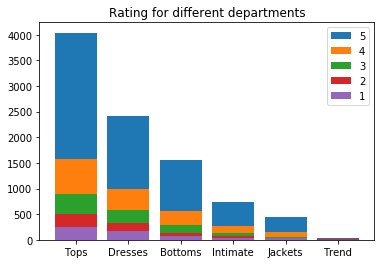

In [38]:
x_stat_rat_dep = stat_rat_dep.index
y5 = stat_rat_dep[5]
y4 = stat_rat_dep[4]
y3 = stat_rat_dep[3]
y2 = stat_rat_dep[2]
y1 = stat_rat_dep[1]


plt.title("Rating for different departments")
plt.bar(x_stat_rat_dep, y5, label = '5')
plt.bar(x_stat_rat_dep, y4, label = '4')
plt.bar(x_stat_rat_dep, y3, label = '3')
plt.bar(x_stat_rat_dep, y2, label = '2')
plt.bar(x_stat_rat_dep, y1, label = '1')
plt.legend()
plt.show()

In [39]:
stat_rec_dep = pd.crosstab(data_train['Department'], data_train['Recommended']).sort_values(by = 1,ascending = False)
stat_rec_dep

Recommended,0,1
Department,,
Tops,1325,5963
Dresses,865,3610
Bottoms,381,2239
Intimate,189,1046
Jackets,114,618
Trend,19,62


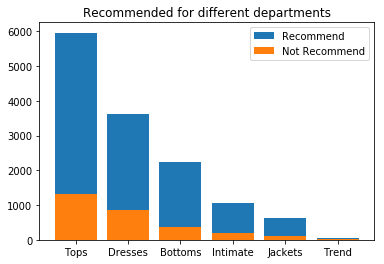

In [40]:
x_stat_rec_dep = stat_rec_dep.index
y1 = stat_rec_dep[1]
y2 = stat_rec_dep[0]

plt.title("Recommended for different departments")
plt.bar(x_stat_rec_dep, y1, label = 'Recommend')
plt.bar(x_stat_rec_dep, y2, label = 'Not Recommend')
plt.legend()
plt.show()

In [41]:
stat_rat_type = pd.crosstab(data_train['Type'], data_train['Rating']).sort_values(by = 5,ascending = False)
stat_rat_type

Rating,1,2,3,4,5
Type,,,,,
Dresses,168,324,578,988,2417
Knits,122,229,416,765,1861
Blouses,89,154,263,462,1161
Sweaters,30,70,143,192,568
Pants,26,60,112,208,537
Jeans,17,38,76,162,508
Fine gauge,15,59,80,160,449
Skirts,20,29,77,141,385
Jackets,25,24,36,84,327


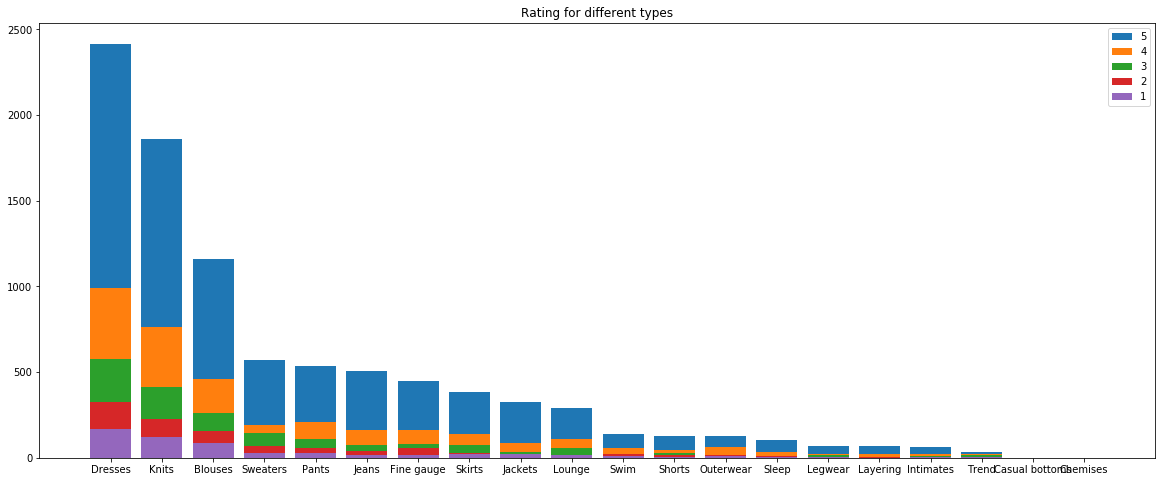

In [42]:
plt.figure(figsize=(20,8))
x_stat_rat_type = stat_rat_type.index
y5 = stat_rat_type[5]
y4 = stat_rat_type[4]
y3 = stat_rat_type[3]
y2 = stat_rat_type[2]
y1 = stat_rat_type[1]


plt.title("Rating for different types")
plt.bar(x_stat_rat_type, y5, label = '5')
plt.bar(x_stat_rat_type, y4, label = '4')
plt.bar(x_stat_rat_type, y3, label = '3')
plt.bar(x_stat_rat_type, y2, label = '2')
plt.bar(x_stat_rat_type, y1, label = '1')
plt.legend()
plt.show()

In [43]:
stat_rec_type = pd.crosstab(data_train['Type'], data_train['Recommended']).sort_values(by = 1,ascending = False)
stat_rec_type

Recommended,0,1
Type,,
Dresses,865,3610
Knits,599,2794
Blouses,409,1720
Sweaters,195,808
Pants,163,780
Jeans,90,711
Fine gauge,122,641
Skirts,92,560
Jackets,71,425


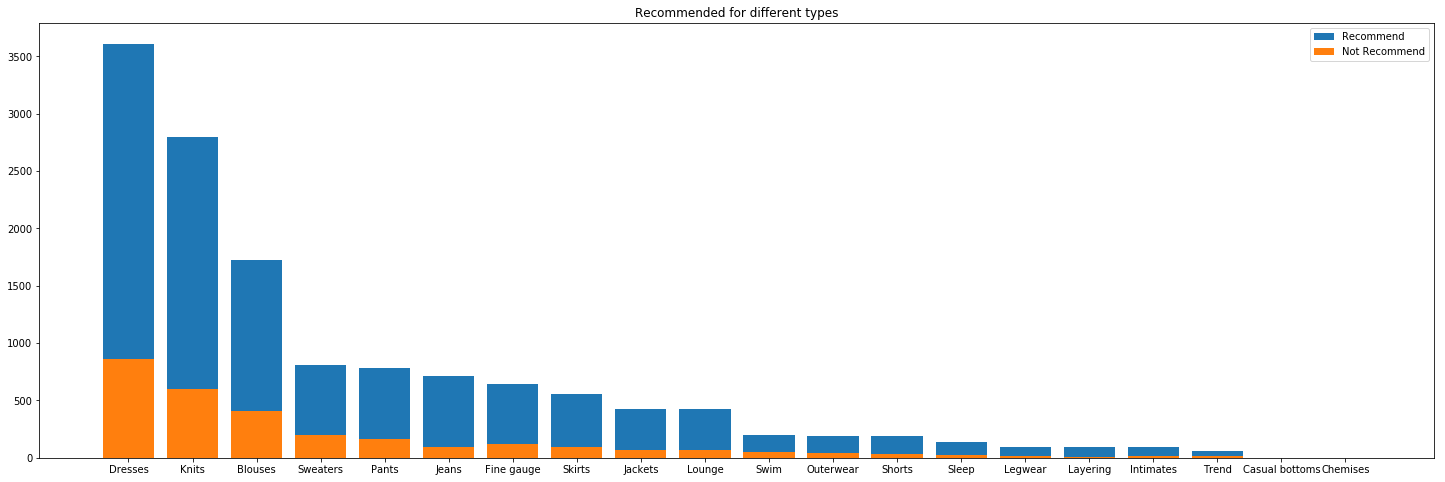

In [44]:
plt.figure(figsize=(25,8))
x_stat_rec_type = stat_rec_type.index
y1 = stat_rec_type[1]
y2 = stat_rec_type[0]

plt.title("Recommended for different types")
plt.bar(x_stat_rec_type, y1, label = 'Recommend')
plt.bar(x_stat_rec_type, y2, label = 'Not Recommend')
plt.legend()
plt.show()

# Age groups

In [45]:
interval = [0,10,20,30,40,50,60,70,80,90,100]
data_train['Age_bins']=pd.cut(data_train['Age'],interval).astype(str)

stat_age_dep = pd.crosstab(data_train['Age_bins'],data_train['Department'])
stat_age_dep

Department,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Age_bins,,,,,,
"(10, 20]",17,30,11,3,46,1
"(20, 30]",324,655,227,95,904,6
"(30, 40]",910,1610,468,251,2290,29
"(40, 50]",684,1119,263,151,1887,23
"(50, 60]",439,660,155,129,1305,12
"(60, 70]",218,339,92,87,728,10
"(70, 80]",24,43,10,13,92,0
"(80, 90]",0,15,8,3,33,0
"(90, 100]",4,4,1,0,3,0


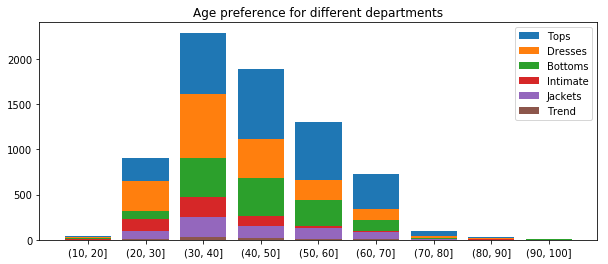

In [46]:
x_age_dep = stat_age_dep.index
y6 = stat_age_dep['Tops']
y5 = stat_age_dep['Dresses']
y4 = stat_age_dep['Bottoms']
y3 = stat_age_dep['Intimate']
y2 = stat_age_dep['Jackets']
y1 = stat_age_dep['Trend']

plt.figure(figsize=(10,4))
plt.title("Age preference for different departments")
plt.bar(x_age_dep, y6, label = 'Tops')
plt.bar(x_age_dep, y5, label = 'Dresses')
plt.bar(x_age_dep, y4, label = 'Bottoms')
plt.bar(x_age_dep, y3, label = 'Intimate')
plt.bar(x_age_dep, y2, label = 'Jackets')
plt.bar(x_age_dep, y1, label = 'Trend')
plt.legend()
plt.show()

# Positive sentiment

In [47]:
conda install -c conda-forge wordcloud


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/osx-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/osx-64'



Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

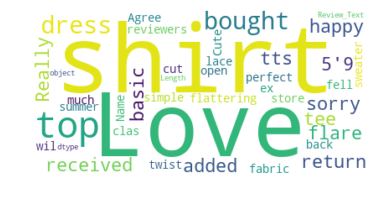

In [49]:

posi_rev = data_train[data_train['Recommended']==1]['Review_Text']

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color = "white", collocations = False, max_words = 5000).generate(str(posi_rev))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

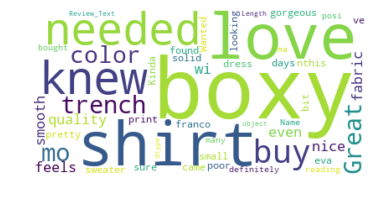

In [50]:
nega_rev = data_train[data_train['Recommended']==0]['Review_Text']

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color = "white", collocations = False, max_words = 5000).generate(str(nega_rev))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

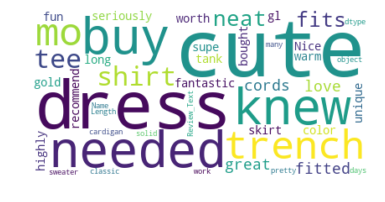

In [51]:
youn_rev = data_train[data_train['Age']< 30]['Review_Text']

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color = "white", collocations = False, max_words = 5000).generate(str(youn_rev))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

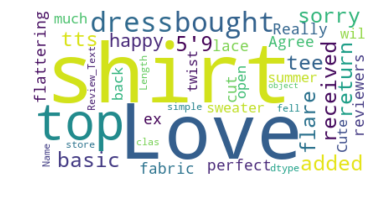

In [52]:
old_rev = data_train[data_train['Age']> 30]['Review_Text']

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color = "white", collocations = False, max_words = 5000).generate(str(old_rev))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

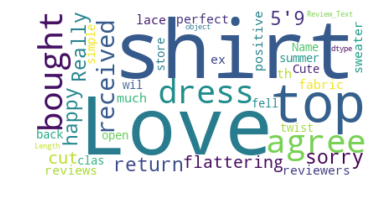

In [53]:
posi_rev_maj = data_train[data_train['Recommended']==1][data_train['Age']> 30][data_train['Age']< 60]['Review_Text']

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color = "white", collocations = False, max_words = 5000).generate(str(posi_rev_maj))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

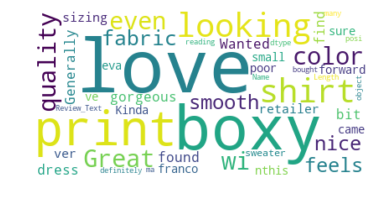

In [54]:
nega_rev_maj = data_train[data_train['Recommended']==0][data_train['Age']> 30][data_train['Age']< 60]['Review_Text']

fig, ax = plt.subplots()
wordcloud = WordCloud(background_color = "white", collocations = False, max_words = 5000).generate(str(nega_rev_maj))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


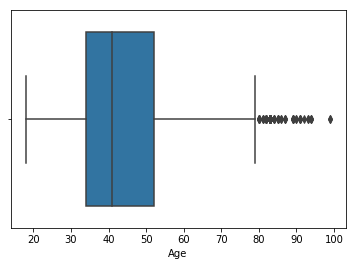

In [55]:
#Identify and remove Outliers
sns.boxplot(x = data_train['Age'])

In [56]:
Age_skew = data_train['Age'].skew().round(3)
print(Age_skew)
print(data_train.shape)
data_train=data_train[-(data_train['Age']>=80)]
print(data_train.shape)

0.532
(16431, 12)
(16354, 12)


In [57]:
data_train = data_train.drop(['Age_bins'],axis = 1)

In [58]:
print(data_train)

          ID  Product_ID  Age                Review_Title  \
0      12906         984   57                      Unique   
1      22440         872   60               Simple beauty   
2      13965         862   35              Love this top!   
3      14369         829   45                    No title   
4        505         833   56                    No title   
...      ...         ...  ...                         ...   
16435   2178         872   32                    No title   
16436    182         895   50  Completes so many outfits!   
16437  18285        1081   45       Great boho chic dress   
16438   7534         949   33                Cute classic   
16439  17157        1094   33        Petite ladies avoid!   

                                             Review_Text  Rating  Recommended  \
0      Just received and sorry to return. i am 5'9" i...       4            1   
1      This is a tts basic tee with the added flare o...       5            1   
2      I am very happy w

# Benchmark Model

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

bag = list(data_train['Review_Text'])

bc_vectorizer = CountVectorizer(max_features = 500)
bc_train = bc_vectorizer.fit_transform(bag).toarray()
bc_test = bc_vectorizer.transform(list(data_test['Review_Text'])).toarray()

print(bc_train.shape)
print(bc_test.shape)
type(bc_test)

(16354, 500)
(6803, 500)


numpy.ndarray

In [60]:
X_bc_train = pd.DataFrame(bc_train, columns = bc_vectorizer.get_feature_names())
Y_bc_train = data_train['Recommended']

X_bc_test = pd.DataFrame(bc_test, columns = bc_vectorizer.get_feature_names())
print('train_set size:', bc_train.shape)
print('test_set size:', bc_test.shape)

train_set size: (16354, 500)
test_set size: (6803, 500)


# building benchmark model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

bc_logit = LogisticRegression(solver = 'liblinear').fit(X_bc_train, Y_bc_train)
bc_results = cross_validate(bc_logit,
                           X_bc_train,
                           Y_bc_train,
                           scoring = ['f1','accuracy','precision','recall','roc_auc'],
                           cv = 5,
                           n_jobs = -1,
                           return_train_score = True)

bc_results

{'fit_time': array([0.73130584, 0.72108793, 0.72368717, 0.73027802, 0.43186116]),
 'score_time': array([0.06879401, 0.07551718, 0.08040309, 0.07639503, 0.03467798]),
 'test_f1': array([0.93137787, 0.93077202, 0.93169052, 0.92861016, 0.93204591]),
 'train_f1': array([0.93925912, 0.94080856, 0.93952729, 0.94003535, 0.93963445]),
 'test_accuracy': array([0.88413329, 0.88321614, 0.88474473, 0.87924182, 0.88593272]),
 'train_accuracy': array([0.89772988, 0.9001758 , 0.89811205, 0.8988764 , 0.8982727 ]),
 'test_precision': array([0.90915518, 0.90934844, 0.9100885 , 0.90489609, 0.91520572]),
 'train_precision': array([0.91939211, 0.91947201, 0.91905565, 0.91875609, 0.91892132]),
 'test_recall': array([0.95471418, 0.9532294 , 0.95434298, 0.95360059, 0.94951745]),
 'train_recall': array([0.96000371, 0.96315887, 0.9609317 , 0.96232368, 0.9613029 ]),
 'test_roc_auc': array([0.90771005, 0.9057312 , 0.91071532, 0.89994519, 0.89648969]),
 'train_roc_auc': array([0.93405866, 0.93339801, 0.93195238, 0

In [62]:
bc_results = pd.DataFrame.from_dict(bc_results).round(3)
bc_results.loc['mean',:] = bc_results.mean().round(3)
bc_results

,fit_time,score_time,test_f1,train_f1,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_roc_auc,train_roc_auc
0,0.731,0.069,0.931,0.939,0.884,0.898,0.909,0.919,0.955,0.960,0.908,0.934
1,0.721,0.076,0.931,0.941,0.883,0.900,0.909,0.919,0.953,0.963,0.906,0.933
2,0.724,0.080,0.932,0.940,0.885,0.898,0.910,0.919,0.954,0.961,0.911,0.932
3,0.730,0.076,0.929,0.940,0.879,0.899,0.905,0.919,0.954,0.962,0.900,0.934
4,0.432,0.035,0.932,0.940,0.886,0.898,0.915,0.919,0.950,0.961,0.896,0.935
mean,0.668,0.067,0.931,0.940,0.883,0.899,0.910,0.919,0.953,0.961,0.904,0.934


# Improved models

In [63]:
ip_train = data_train.copy()
ip_test = data_test.copy()


#create new features
#abtract the key words

import re

In [64]:
#feature1: the numbers of positive words in review text
ip_word_train = []
for i in ip_train['Review_Text']:
    results_train = re.findall(r'(perfect|agree|happy|flattering|flare|good|cozy|well|comfort|great|best|match|nice)', i)
    ip_word_train.append(len(results_train))
ip_train['Positive_Number'] = ip_word_train
ip_train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type,Positive_Number
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets,0
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits,2
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits,2
3,14369,829,45,No title,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses,2
4,505,833,56,No title,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses,1


In [65]:
ip_train["Age_rate"] = int(0)

ip_train.loc[((ip_train['Age']>30)&(ip_train['Age']<=60)),"Age_rate"]="3"
ip_train.loc[(ip_train['Age']<=30),"Age_rate"]="2"
ip_train.loc[((ip_train['Age']>60)&(ip_train['Age']<=70)),"Age_rate"]="2"
ip_train.loc[(ip_train['Age']>70),"Age_rate"]="1"

ip_train['Age_rate'] = ip_train['Age_rate'].str.replace(',','').astype(int)
ip_train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type,Positive_Number,Age_rate
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets,0,3
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits,2,3
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits,2,3
3,14369,829,45,No title,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses,2,3
4,505,833,56,No title,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses,1,3


In [66]:
#feature2: enhance the rating by age rate
ip_train['Age_Rating'] = ip_train['Rating']*np.exp(ip_train['Age_rate'])
ip_train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type,Positive_Number,Age_rate,Age_Rating
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets,0,3,80.342148
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits,2,3,100.427685
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits,2,3,100.427685
3,14369,829,45,No title,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses,2,3,100.427685
4,505,833,56,No title,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses,1,3,80.342148


In [67]:
#feature3: enhance the rating by Positive_Feedback_Count
ip_train['Rating2'] = ip_train['Rating'].map({5:2,4:1,3:0,2:-1,1:-2})
ip_train['Feedback_Rating'] = ip_train['Rating2']*(ip_train['Positive_Feedback_Count']+1)
ip_train.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Recommended,Positive_Feedback_Count,Division,Department,Type,Positive_Number,Age_rate,Age_Rating,Rating2,Feedback_Rating
0,12906,984,57,Unique,"Just received and sorry to return. i am 5'9"" i...",4,1,1,General Petite,Jackets,Jackets,0,3,80.342148,1,2
1,22440,872,60,Simple beauty,This is a tts basic tee with the added flare o...,5,1,3,General Petite,Tops,Knits,2,3,100.427685,2,8
2,13965,862,35,Love this top!,I am very happy with this shirt. i don't like ...,5,1,0,General,Tops,Knits,2,3,100.427685,2,2
3,14369,829,45,No title,"Really flattering cut, this shirt is perfect f...",5,1,0,General Petite,Tops,Blouses,2,3,100.427685,2,2
4,505,833,56,No title,Love the fabric & lace on this top. like other...,4,1,0,General,Tops,Blouses,1,3,80.342148,1,1


In [68]:
ip_train.corr()['Recommended']

ID                        -0.009152
Product_ID                -0.015180
Age                        0.033429
Rating                     0.794254
Recommended                1.000000
Positive_Feedback_Count   -0.068271
Positive_Number            0.181797
Age_rate                  -0.011171
Age_Rating                 0.484011
Rating2                    0.794254
Feedback_Rating            0.319689
Name: Recommended, dtype: float64

In [69]:
#feature1:
ip_word_test = []
for i in ip_test['Review_Text']:
    results_test = re.findall(r'(perfect|agree|happy|flattering|flare|good|cozy|well|comfort|great|best|match|nice)', i)
    ip_word_test.append(len(results_test))
ip_test['Positive_Number'] = ip_word_test
ip_test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type,Positive_Number
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,14,General,Dresses,Dresses,0
1,11,1095,39,No title,This dress is perfection! so pretty and flatte...,5,2,General Petite,Dresses,Dresses,2
2,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,0,Initmates,Intimate,Intimates,0
3,19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,0,General,Dresses,Dresses,3
4,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,0,General,Tops,Blouses,1


In [70]:
ip_test["Age_rate"] = int(0)

ip_test.loc[((ip_test['Age']>30)&(ip_test['Age']<=60)),"Age_rate"]="3"
ip_test.loc[(ip_test['Age']<=30),"Age_rate"]="2"
ip_test.loc[((ip_test['Age']>60)&(ip_test['Age']<=70)),"Age_rate"]="2"
ip_test.loc[(ip_test['Age']>70),"Age_rate"]="1"

ip_test['Age_rate'] = ip_test['Age_rate'].str.replace(',','').astype(int)
ip_test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type,Positive_Number,Age_rate
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,14,General,Dresses,Dresses,0,3
1,11,1095,39,No title,This dress is perfection! so pretty and flatte...,5,2,General Petite,Dresses,Dresses,2,3
2,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,0,Initmates,Intimate,Intimates,0,3
3,19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,0,General,Dresses,Dresses,3,3
4,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,0,General,Tops,Blouses,1,3


In [71]:
#feature2: 
ip_test['Age_Rating'] = ip_test['Rating']*np.exp(ip_test['Age_rate'])
ip_test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type,Positive_Number,Age_rate,Age_Rating
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,14,General,Dresses,Dresses,0,3,60.256611
1,11,1095,39,No title,This dress is perfection! so pretty and flatte...,5,2,General Petite,Dresses,Dresses,2,3,100.427685
2,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,0,Initmates,Intimate,Intimates,0,3,100.427685
3,19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,0,General,Dresses,Dresses,3,3,100.427685
4,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,0,General,Tops,Blouses,1,3,100.427685


In [72]:
#feature3: 
ip_test['Rating2'] = ip_test['Rating'].map({5:2,4:1,3:0,2:-1,1:-2})
ip_test['Feedback_Rating'] = ip_test['Rating2']*(ip_test['Positive_Feedback_Count']+1)
ip_test.head()

,ID,Product_ID,Age,Review_Title,Review_Text,Rating,Positive_Feedback_Count,Division,Department,Type,Positive_Number,Age_rate,Age_Rating,Rating2,Feedback_Rating
0,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,14,General,Dresses,Dresses,0,3,60.256611,0,0
1,11,1095,39,No title,This dress is perfection! so pretty and flatte...,5,2,General Petite,Dresses,Dresses,2,3,100.427685,2,6
2,13,767,44,Runs big,Bought the black xs to go under the larkspur m...,5,0,Initmates,Intimate,Intimates,0,3,100.427685,2,2
3,19,1077,47,Stylish and comfortable,I love the look and feel of this tulle dress. ...,5,0,General,Dresses,Dresses,3,3,100.427685,2,2
4,24,847,55,Versatile,"I love this shirt because when i first saw it,...",5,0,General,Tops,Blouses,1,3,100.427685,2,2


# Encoding

In [73]:
new_train = ip_train.drop(['ID','Review_Title','Review_Text','Age_rate','Recommended','Rating2'],axis = 1)
new_test = ip_test.drop(['ID','Review_Title','Age_rate','Review_Text','Rating2'],axis = 1)

print(new_train.shape)
print(new_test.shape)

(16354, 10)
(6803, 10)


In [74]:
new_train_dum = pd.get_dummies(new_train, drop_first = True)
new_test_dum = pd.get_dummies(new_test, drop_first = True)

print(new_train_dum.shape)
print(new_test_dum.shape)

(16354, 33)
(6803, 32)


In [75]:
train_dif1 = []
for i in new_train_dum.columns:
    if i not in new_test_dum.columns:
        train_dif1.append(i)
train_dif1

['Type_Chemises']

In [76]:
train_dif2 = []
for i in new_test_dum.columns:
    if i not in new_train_dum.columns:
        train_dif2.append(i)
train_dif2

[]

In [77]:
new_train_dum = new_train_dum.drop('Type_Chemises', axis = 1)

In [78]:
print(new_train_dum.shape)
print(new_test_dum.shape)

(16354, 32)
(6803, 32)


# Log transformation

In [79]:
descriptive = new_train.describe()
descriptive.loc['skew',:] = new_train.skew()
descriptive.loc['kurt',:] = new_train.kurt()
descriptive.round(3)

,Product_ID,Age,Rating,Positive_Feedback_Count,Positive_Number,Age_Rating,Feedback_Rating
count,16354.000,16354.000,16354.000,16354.000,16354.000,16354.000,16354.000
mean,918.822,42.999,4.202,2.566,1.294,71.123,3.870
std,203.347,11.955,1.106,5.920,1.211,30.443,10.204
min,0.000,18.000,1.000,0.000,0.000,2.718,-218.000
25%,861.000,34.000,4.000,0.000,0.000,36.945,1.000
50%,936.000,41.000,5.000,1.000,1.000,80.342,2.000
75%,1078.000,51.000,5.000,3.000,2.000,100.428,4.000
max,1205.000,79.000,5.000,122.000,9.000,100.428,236.000
skew,-2.091,0.417,-1.325,6.843,0.985,-0.475,4.920
kurt,5.209,-0.484,0.838,77.763,1.116,-1.329,95.539


In [80]:
for i in ['Age','Positive_Feedback_Count','Positive_Number','Feedback_Rating']:
    new_train[i] = np.log(new_train[i]+1)
    new_test[i] = np.log(new_test[i]+1)

In [81]:
descriptive = new_train.describe()
descriptive.loc['skew',:] = new_train.skew()
descriptive.loc['kurt',:] = new_train.kurt()
descriptive.round(3)

,Product_ID,Age,Rating,Positive_Feedback_Count,Positive_Number,Age_Rating,Feedback_Rating
count,16354.000,16354.000,16354.000,16354.000,16354.000,16354.000,15132.000
mean,918.822,3.747,4.202,0.745,0.693,71.123,-inf
std,203.347,0.276,1.106,0.891,0.531,30.443,NaN
min,0.000,2.944,1.000,0.000,0.000,2.718,-inf
25%,861.000,3.555,4.000,0.000,0.000,36.945,0.693
50%,936.000,3.738,5.000,0.693,0.693,80.342,1.099
75%,1078.000,3.951,5.000,1.386,1.099,100.428,1.609
max,1205.000,4.382,5.000,4.812,2.303,100.428,5.468
skew,-2.091,-0.152,-1.325,1.097,-0.005,-0.475,NaN
kurt,5.209,-0.508,0.838,0.562,-1.076,-1.329,NaN


In [82]:
#scaling
for i in ['Age','Rating','Positive_Feedback_Count','Positive_Number','Age_Rating','Feedback_Rating']:
    new_train_dum[i] -= new_train_dum[i].min()
    new_train_dum[i] /= (new_train_dum[i].max()-new_train_dum[i].min())
    
    new_test_dum[i] -= new_test_dum[i].min()
    new_test_dum[i] /= (new_test_dum[i].max()-new_test_dum[i].min())

In [83]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

bag_ip = list(ip_train['Review_Text'])
tf_vectorizer = TfidfVectorizer(max_features = 2500, analyzer = 'word',
                               stop_words = "english", ngram_range = (1,3), max_df = 0.85, min_df = 2)

tf_ip_train = tf_vectorizer.fit_transform(bag_ip).toarray()
tf_ip_test = tf_vectorizer.transform(list(ip_test['Review_Text'])).toarray()

print(tf_ip_train.shape)
print(tf_ip_test.shape)

(16354, 2500)
(6803, 2500)


In [84]:
X_tf_ip_train = pd.DataFrame(tf_ip_train,
                            columns = tf_vectorizer.get_feature_names(),
                            index = new_train_dum.index)

print(X_tf_ip_train.shape)

X_tf_train = pd.concat([X_tf_ip_train,new_train_dum],axis =1, ignore_index = False,
                verify_integrity = True)

Y_tf_train = ip_train['Recommended'] 
print(X_tf_train.shape)

(16354, 2500)
(16354, 2532)


In [85]:
X_tf_ip_test = pd.DataFrame(tf_ip_test,
                            columns = tf_vectorizer.get_feature_names(),
                            index = new_test_dum.index)

print(X_tf_ip_test.shape)

X_tf_test = pd.concat([X_tf_ip_test,new_test_dum],axis =1, ignore_index = False,
                verify_integrity = True)

print(X_tf_test.shape)

(6803, 2500)
(6803, 2532)


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
%%time
ip_parameters = [{'penalty':['l1','l2'], 'C':[0.01, 0.03, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
                 'solver':['liblinear','saga'], 'multi_class':['ovr']},
                {'penalty':['l2'], 'C':[0.01, 0.03, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
                 'solver':['lbfgs'], 'multi_class':['ovr','multinomial']}]
ip_grid = GridSearchCV(LogisticRegression(tol = 1e-6, random_state = 1, class_weight = 'balanced'),
                       ip_parameters, cv = 5, verbose = 1, n_jobs = -1, scoring = 'f1')
ip_fit = ip_grid.fit(X_tf_train, Y_tf_train)
print('Best parameters set found:', ip_fit.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 57.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 68.6min finished


Best parameters set found: {'C': 5, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 6.17 s, sys: 2.34 s, total: 8.52 s
Wall time: 1h 8min 36s


In [88]:
ip_gridcv = ip_fit.best_estimator_
ip_gridcv

LogisticRegression(C=5, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='liblinear', tol=1e-06, verbose=0, warm_start=False)

In [90]:
#assess the val score
from sklearn.model_selection import cross_val_score
grid_score = np.mean(cross_val_score(ip_gridcv, X_tf_train, Y_tf_train, cv=5, scoring = 'f1')).round(3)

print('logitcv_f1 score:{0}'.format(grid_score))

logitcv_f1 score:0.962


In [91]:
#assess the validate
from sklearn.model_selection import cross_validate
ip_cv_results = cross_validate(ip_gridcv, X_tf_train, Y_tf_train,
                               scoring = ['f1','accuracy','precision','recall','roc_auc'],
                               cv = 5,
                               n_jobs = -1,
                               return_train_score = True)

ip_cv_results

{'fit_time': array([3.45909619, 3.42865109, 3.46076107, 3.51293111, 1.74787092]),
 'score_time': array([0.30052495, 0.31773114, 0.29786086, 0.29709172, 0.15442109]),
 'test_f1': array([0.96059395, 0.96338241, 0.96124031, 0.96450151, 0.95905542]),
 'train_f1': array([0.9771231 , 0.97649512, 0.97586648, 0.97634286, 0.97751692]),
 'test_accuracy': array([0.9367166 , 0.94069092, 0.93732803, 0.94252522, 0.93425076]),
 'train_accuracy': array([0.96308186, 0.96208821, 0.96109455, 0.9618589 , 0.96369612]),
 'test_precision': array([0.985932  , 0.98003072, 0.97957611, 0.98155265, 0.98474775]),
 'train_precision': array([0.99787172, 0.99777261, 0.99767329, 0.99806145, 0.99758477]),
 'test_recall': array([0.93652561, 0.94729027, 0.94357832, 0.94803267, 0.93466964]),
 'train_recall': array([0.95721975, 0.95610616, 0.95499258, 0.95554937, 0.95824053]),
 'test_roc_auc': array([0.97756488, 0.98020957, 0.97732557, 0.97927997, 0.9783579 ]),
 'train_roc_auc': array([0.99430645, 0.99434511, 0.99443448, 0

In [92]:
pd.DataFrame.from_dict(ip_cv_results).mean().round(3)

fit_time           3.122
score_time         0.274
test_f1            0.962
train_f1           0.977
test_accuracy      0.938
train_accuracy     0.962
test_precision     0.982
train_precision    0.998
test_recall        0.942
train_recall       0.956
test_roc_auc       0.979
train_roc_auc      0.994
dtype: float64

In [93]:
pd.DataFrame.from_dict(bc_results).mean().round(3)

fit_time           0.668
score_time         0.067
test_f1            0.931
train_f1           0.940
test_accuracy      0.883
train_accuracy     0.899
test_precision     0.910
train_precision    0.919
test_recall        0.953
train_recall       0.961
test_roc_auc       0.904
train_roc_auc      0.934
dtype: float64

# Interpreting Results:

In [94]:
coef_cv = pd.Series(ip_gridcv.coef_.ravel(),index = X_tf_train.columns).sort_values(ascending = True, inplace = False).round(3)
coef_cv

walking        -4.608
wanted love    -4.163
flannel        -4.028
runs small     -4.022
returned       -3.985
                ...  
casual          3.283
order           3.929
slightly        4.263
unique          4.732
Rating         13.034
Length: 2532, dtype: float64

In [95]:
ends_15 = coef_cv[:15].append(coef_cv[-15:]).round(3)
ends_15

walking          -4.608
wanted love      -4.163
flannel          -4.028
runs small       -4.022
returned         -3.985
flair            -3.975
asymmetrical     -3.577
ordered usual    -3.574
billowy          -3.505
great length     -3.504
fabric nice      -3.472
realize          -3.462
tight arms       -3.440
disappointed     -3.322
retailer tops    -3.221
nice fabric       2.827
recommend         2.833
bit               2.893
10 12             2.946
bust              2.952
dye               2.982
dressed           3.012
medium            3.073
love shirt        3.114
different         3.197
casual            3.283
order             3.929
slightly          4.263
unique            4.732
Rating           13.034
dtype: float64

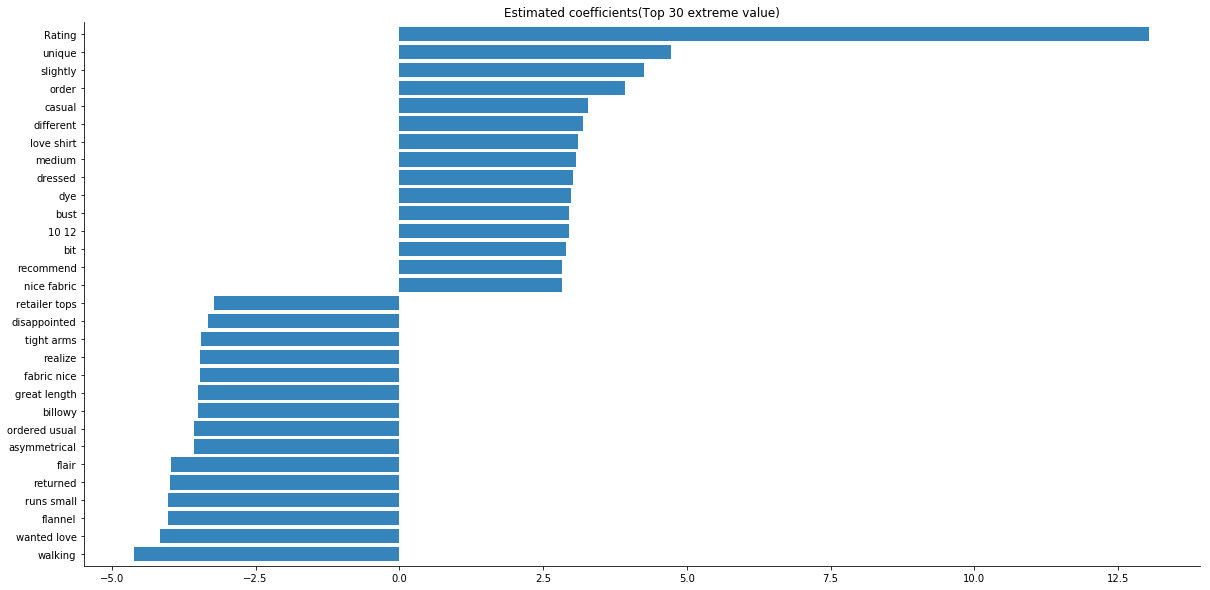

In [96]:
fig, ax = plt.subplots(figsize = (20,10))
ends_15.plot(kind = 'barh', width = 0.8, alpha = 0.9, ax = ax)
ax.set_title('Estimated coefficients(Top 30 extreme value)')
sns.despine()
plt.show()

In [97]:
#解读type division department
Type_cate = []
Department_cate = []
Division_cate = []
for i in X_tf_train.columns:
    if 'Type' in i.split('_'):
        Type_cate.append(i)
    elif 'Department' in i.split('_'):
        Department_cate.append(i)
    elif 'Division' in i.split('_'):
        Division_cate.append(i)
        
print(Type_cate)
print(Department_cate)
print(Division_cate)

['Type_Casual bottoms', 'Type_Dresses', 'Type_Fine gauge', 'Type_Intimates', 'Type_Jackets', 'Type_Jeans', 'Type_Knits', 'Type_Layering', 'Type_Legwear', 'Type_Lounge', 'Type_Outerwear', 'Type_Pants', 'Type_Shorts', 'Type_Skirts', 'Type_Sleep', 'Type_Sweaters', 'Type_Swim', 'Type_Trend']
['Department_Dresses', 'Department_Intimate', 'Department_Jackets', 'Department_Tops', 'Department_Trend']
['Division_General Petite', 'Division_Initmates']


In [98]:
division_results = coef_cv.loc[Division_cate].sort_values().round(3)
division_results

Division_General Petite   -0.045
Division_Initmates         0.690
dtype: float64

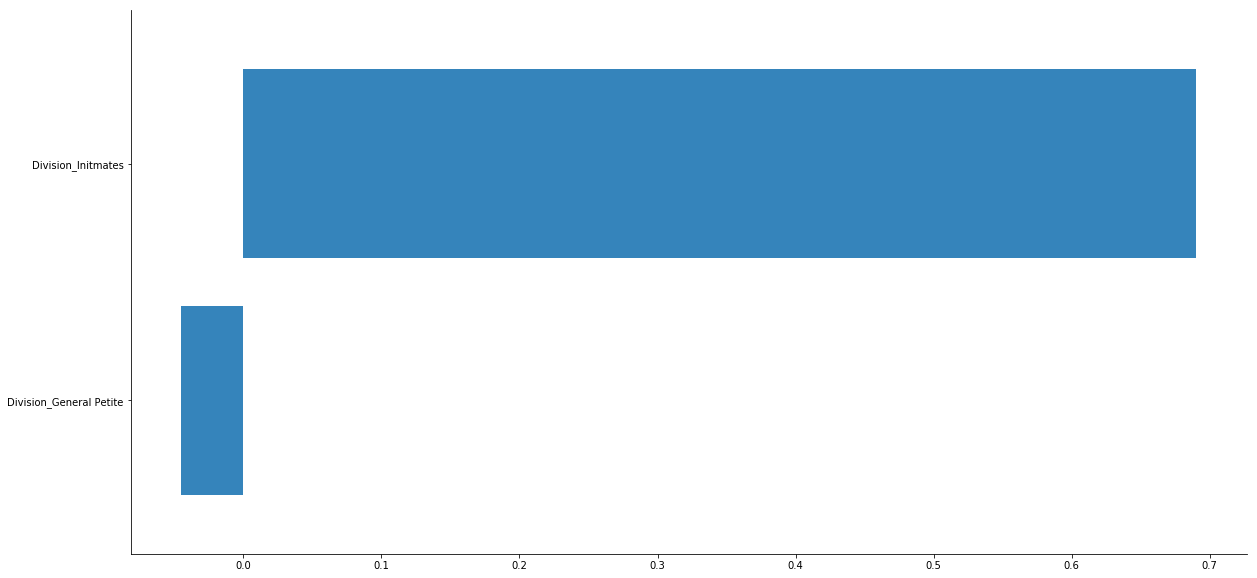

In [99]:
fig, ax = plt.subplots(figsize = (20,10))
division_results.plot(kind = 'barh', width = 0.8, alpha = 0.9, ax = ax)
sns.despine()
plt.show()

In [100]:
department_results = coef_cv.loc[Department_cate].sort_values().round(3)
department_results

Department_Intimate   -1.263
Department_Tops       -0.694
Department_Jackets    -0.568
Department_Trend      -0.398
Department_Dresses    -0.296
dtype: float64

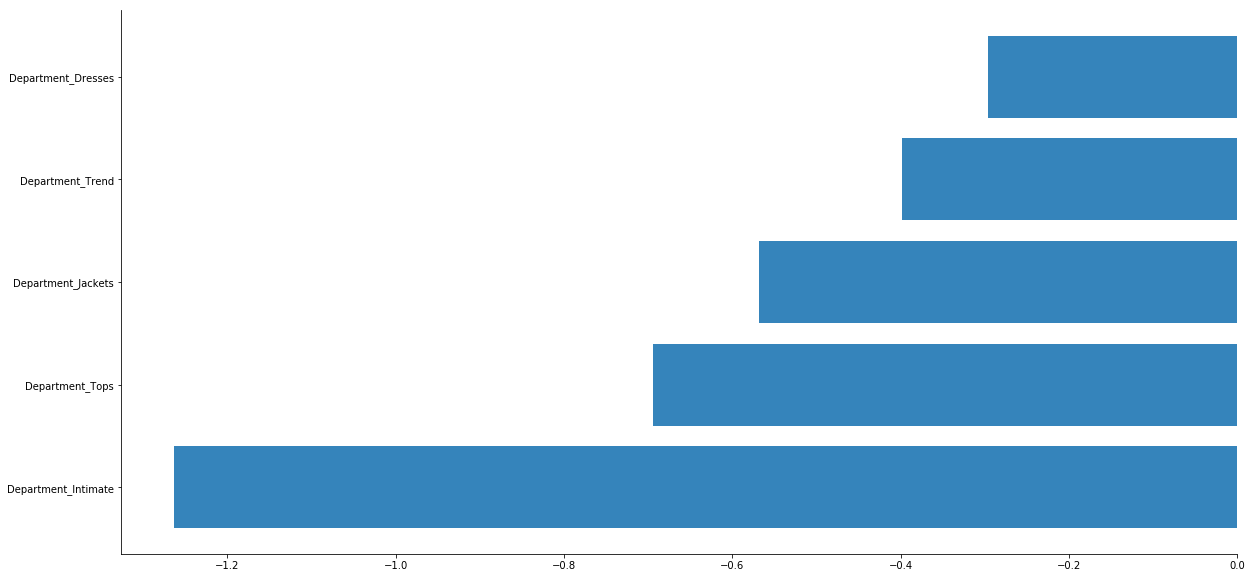

In [101]:
fig, ax = plt.subplots(figsize = (20,10))
department_results.plot(kind = 'barh', width = 0.8, alpha = 0.9, ax = ax)
sns.despine()
plt.show()

In [102]:
type_results = coef_cv.loc[Type_cate].sort_values().round(3)
type_results

Type_Pants            -1.006
Type_Shorts           -0.850
Type_Legwear          -0.729
Type_Skirts           -0.635
Type_Outerwear        -0.493
Type_Trend            -0.398
Type_Swim             -0.302
Type_Dresses          -0.296
Type_Lounge           -0.199
Type_Sleep            -0.124
Type_Layering         -0.087
Type_Jackets          -0.075
Type_Jeans            -0.032
Type_Sweaters          0.002
Type_Casual bottoms    0.005
Type_Knits             0.053
Type_Intimates         0.167
Type_Fine gauge        0.195
dtype: float64

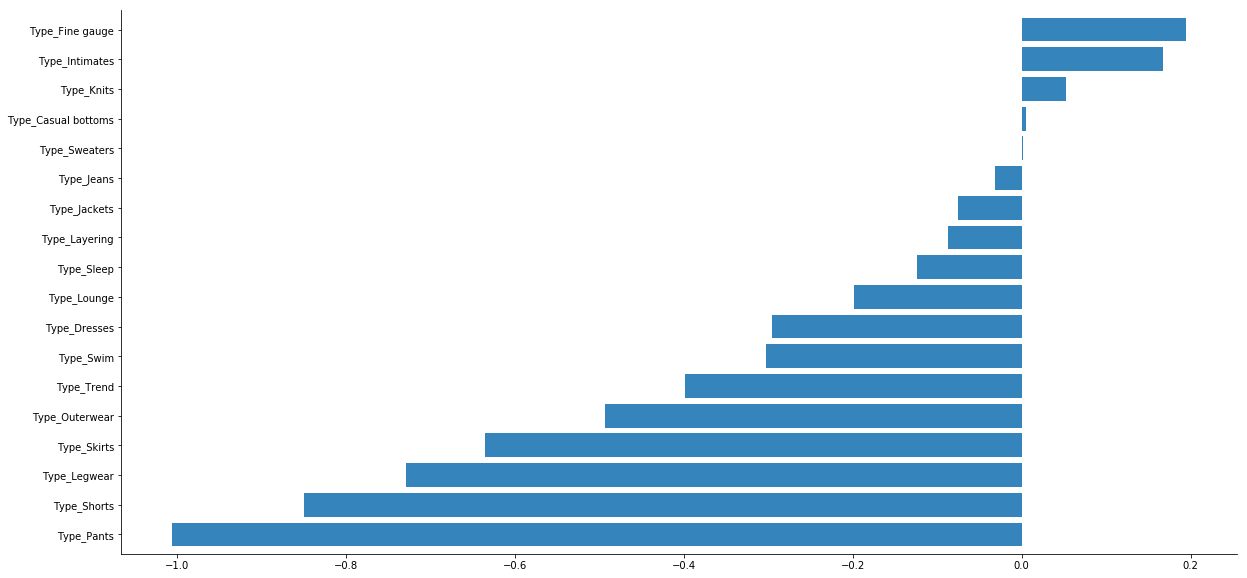

In [103]:
fig, ax = plt.subplots(figsize = (20,10))
type_results.plot(kind = 'barh', width = 0.8, alpha = 0.9, ax = ax)
sns.despine()
plt.show()

In [104]:
coef_cv.loc[['Positive_Feedback_Count']].round(3)

Positive_Feedback_Count   -0.93
dtype: float64

In [105]:
coef_cv.loc[['Age']].round(3)

Age    0.743
dtype: float64

In [106]:
coef_cv.loc[['Positive_Number']].round(3)

Positive_Number    1.267
dtype: float64

In [107]:
coef_cv.loc[['Age_Rating']].round(3)

Age_Rating    0.056
dtype: float64

In [108]:
coef_cv.loc[['Feedback_Rating']].round(3)

Feedback_Rating   -1.317
dtype: float64

# Final model test

In [109]:
Y_pred = ip_gridcv.predict(X_tf_test)
pred_results = pd.DataFrame(np.c_[data_test['ID'].values, Y_pred], columns = ['ID','Recommended'])
pred_results.to_csv('222_Test_Results.csv',index = False)